# EDA and Visualization

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Children Stories Text Corpus Dataset

In [ ]:
with open('/content/gdrive/MyDrive/cleaned_merged_fairy_tales_without_eos.txt', 'r', encoding='utf-8') as f:
    text_data = f.read()

In [ ]:
# split text data
sections = text_data.split("\n\n")

titles = []
stories = []
current_title = None
current_story = []

for section in sections:
  section = section.strip()
  if not section:
    continue
  if len(section) < 100 and '.' not in section:
    if current_title and current_story:
      stories.append(' '.join(current_story))
      titles.append(current_title)
    current_title = section
    current_story = []
  else: current_story.append(section)

# add last story to list of stories
if current_title and current_story:
  stories.append(' '.join(current_story))
  titles.append(current_title)

# create dataframe
text_df = pd.DataFrame({'title': titles, 'story': stories})
print(f"parsed {len(text_df)} stories from text dataset")

parsed 62 stories from text dataset


In [ ]:
text_df.describe()

,title,story
count,62,62
unique,59,62
top,THE CHIMÆRA,"There was once a poor Prince, who had a kingdo..."
freq,2,1


In [ ]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   62 non-null     object
 1   story   62 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB


In [ ]:
print(text_df.shape)

(62, 2)


In [ ]:
# get number of sentences
text_df['num_sentences'] = text_df['story'].apply(lambda x: len([s for s in x.split('.') if s.strip()]))

# number of words
text_df['num_words'] = text_df['story'].apply(lambda x: len(x.split()))

# average words per sentence
text_df['average_words'] = text_df['num_words'] / text_df['num_sentences']

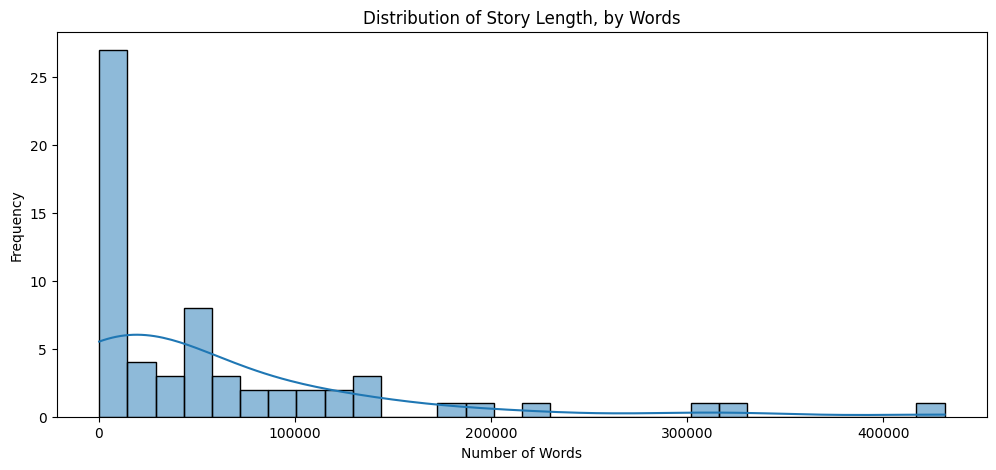

In [ ]:
plt.figure(figsize=(12,5))
sns.histplot(text_df['num_words'], bins=30, kde=True)
plt.title('Distribution of Story Length, by Words')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

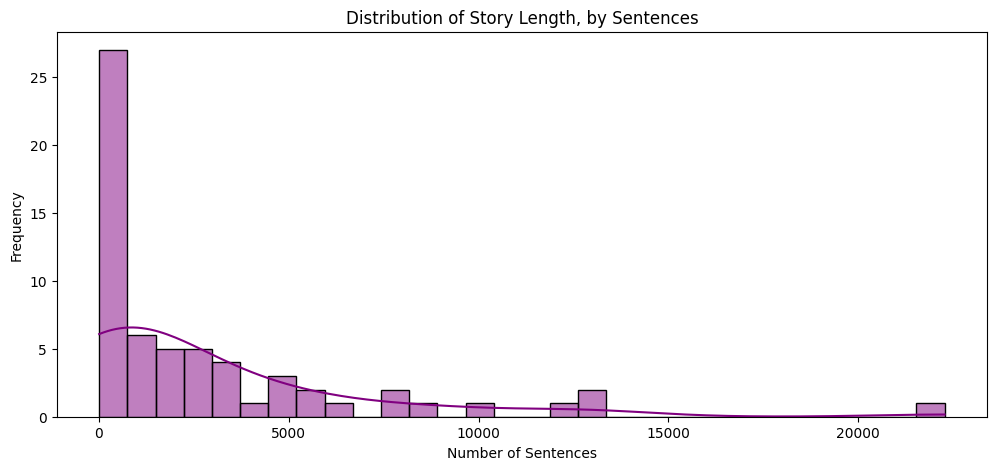

In [ ]:
plt.figure(figsize=(12,5))
sns.histplot(text_df['num_sentences'], bins=30, kde=True, color='purple')
plt.title('Distribution of Story Length, by Sentences')
plt.xlabel('Number of Sentences')
plt.ylabel('Frequency')
plt.show()

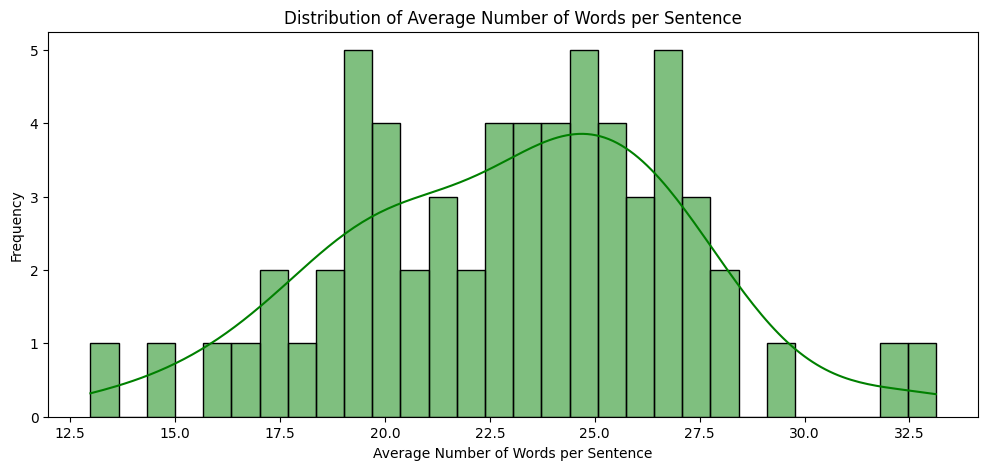

In [ ]:
plt.figure(figsize=(12,5))
sns.histplot(text_df['average_words'], bins=30, kde=True, color='green')
plt.title('Distribution of Average Number of Words per Sentence')
plt.xlabel('Average Number of Words per Sentence')
plt.ylabel('Frequency')
plt.show()

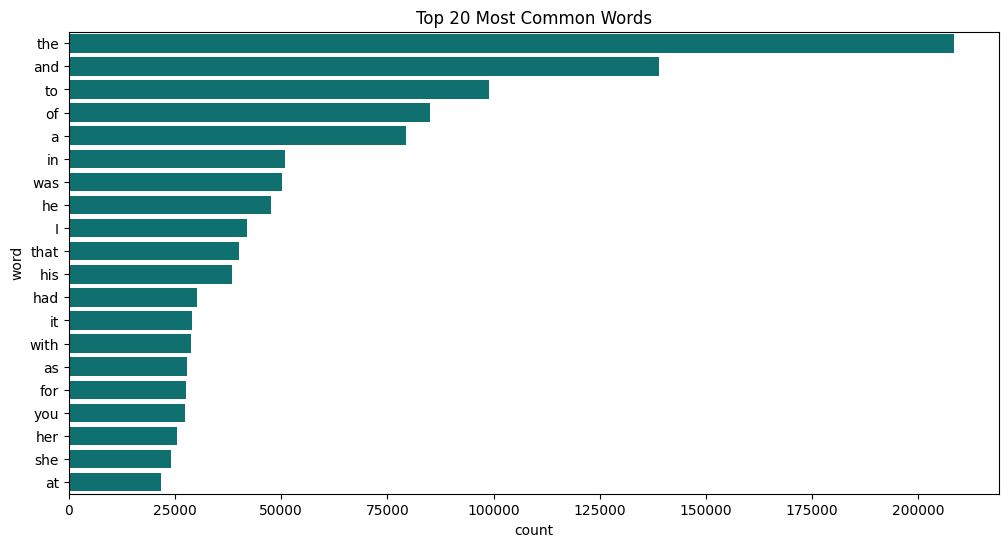

In [ ]:
from collections import Counter

all_words = ' '.join(text_df['story']).split()
word_counts = Counter(all_words)
common_words = word_counts.most_common(20)

# convert to data frame
common_df = pd.DataFrame(common_words, columns=['word','count'])

plt.figure(figsize=(12,6))
sns.barplot(x='count', y='word', data=common_df, color='teal')
plt.title('Top 20 Most Common Words')
plt.show()

In [ ]:
text_df['num_unique_words'] = text_df['story'].apply(lambda x: len(set(x.split())))

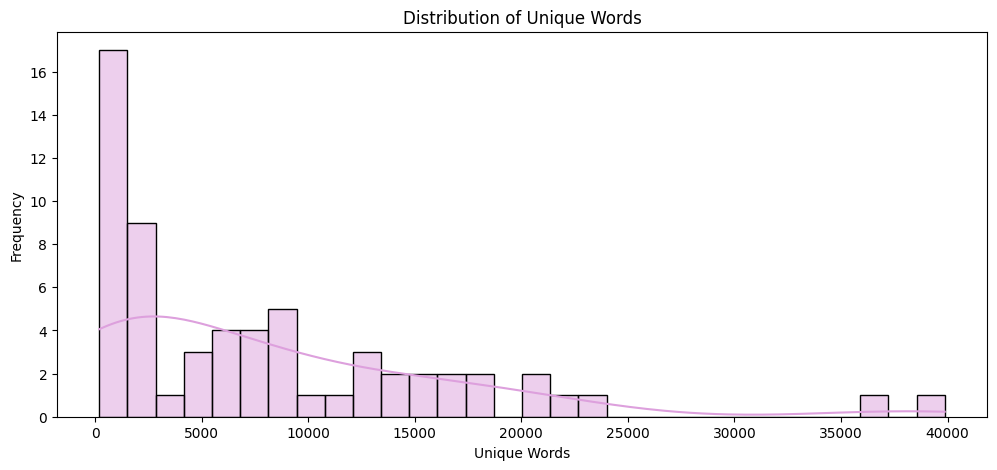

In [ ]:
plt.figure(figsize=(12,5))
sns.histplot(text_df['num_unique_words'], bins=30, kde=True, color='plum')
plt.title('Distribution of Unique Words')
plt.xlabel('Unique Words')
plt.ylabel('Frequency')
plt.show()

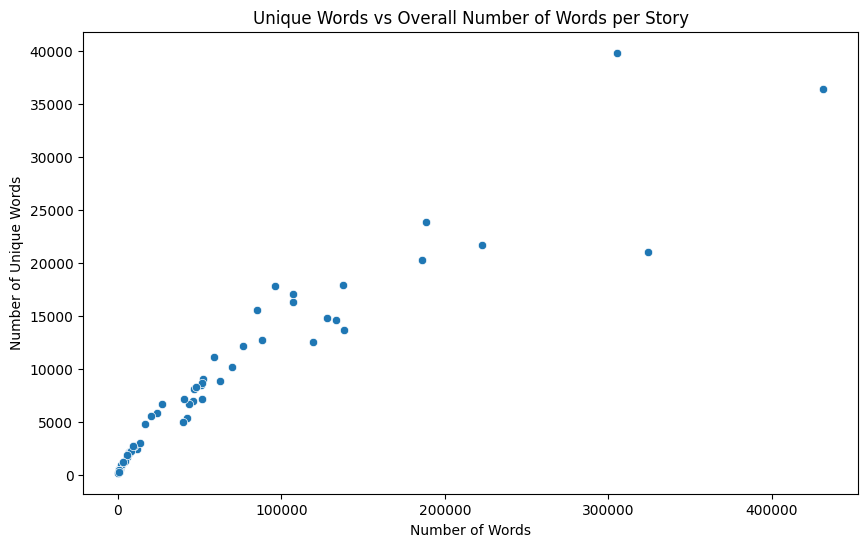

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='num_words', y='num_unique_words', data=text_df)
plt.title('Unique Words vs Overall Number of Words per Story')
plt.xlabel('Number of Words')
plt.ylabel('Number of Unique Words')
plt.show()

## 1000+ Children Books Dataset

In [ ]:
books_df = pd.read_csv('/content/books_data.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/books_data.csv'

In [ ]:
books_df.info()

In [ ]:
books_df.describe()

In [ ]:
print(books_df.shape)

In [ ]:
books_df.head()

In [ ]:
plt.figure(figsize=(12,5))
sns.histplot(books_df['Rating_out_of_5'], bins=10, kde=True, color='skyblue')
plt.title('distribution of ratings')
plt.xlabel('rating out of 5')
plt.show()

In [ ]:
plt.figure(figsize=(12,5))
sns.histplot(books_df['No_of_Ratings'], bins=30, color='olive')
plt.title('distribution of number of ratings')
plt.xlabel('number of ratings')
plt.show()

In [ ]:
# age column is not numeric
age_clean = books_df['Age'].str.replace('Ages:', '', regex=False).str.replace('years', '', regex=False).str.replace('and up', '', regex=False).str.strip()

age_range = age_clean.str.split('-', expand=True)

books_df['min_age'] = pd.to_numeric(age_range[0], errors='coerce')
books_df['max_age'] = pd.to_numeric(age_range[1], errors='coerce')

# that said, if max_age is missing, then use min_age
books_df['max_age'] = books_df['max_age'].fillna(books_df['min_age'])

# create average age
books_df['average_age'] = books_df[['min_age','max_age']].mean(axis=1)

plt.figure(figsize=(12,5))
sns.histplot(books_df['average_age'].dropna(), bins=20, color='slateblue')
plt.title('distribution of ages')
plt.xlabel('average age')
plt.show()

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(x='Cover_Type', data=books_df, order=books_df['Cover_Type'].value_counts().index, color="steelblue")
plt.title('book cover type distribution')
plt.xlabel('cover type')
plt.ylabel('count')
plt.show()

In [ ]:
# is there any missing data
missing = books_df.isnull().sum()
missing = missing[missing > 0]

plt.figure(figsize=(12,5))
sns.barplot(x=missing.index, y=missing.values, color="hotpink")
plt.xticks(rotation=45)
plt.title('missing values per column')
plt.show()

In [ ]:
# analyze authors
top_authors = books_df['Author'].value_counts().head(10)

plt.figure(figsize=(12,5))
sns.barplot(x=top_authors.values, y=top_authors.index, color='salmon')
plt.title('top 10 authors by number of books')
plt.show()